<a href="https://colab.research.google.com/github/shubhamtiwari2002/dogs-vs-cats-deep-learning/blob/main/shubham_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:06<00:00, 143MB/s]
100% 1.06G/1.06G [00:06<00:00, 184MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout



In [ ]:
#generators since it divides data into batches and also it ios used to process large dataset
train_ds=keras.utils.image_dataset_from_directory(
    directory  = '/content/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory  = '/content/test',
    labels= 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds = validation_ds.map(process)
 

In [ ]:
#create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))



model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 32)     128       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 89ms/step - loss: 0.7923 - accuracy: 0.6389 - val_loss: 0.6016 - val_accuracy: 0.6878
Epoch 2/10
625/625 [==============================] - 56s 88ms/step - loss: 0.5244 - accuracy: 0.7371 - val_loss: 0.4927 - val_accuracy: 0.7640
Epoch 3/10
625/625 [==============================] - 56s 90ms/step - loss: 0.4545 - accuracy: 0.7852 - val_loss: 0.5304 - val_accuracy: 0.7270
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.3826 - accuracy: 0.8270 - val_loss: 0.4838 - val_accuracy: 0.7662
Epoch 5/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3183 - accuracy: 0.8612 - val_loss: 0.4734 - val_accuracy: 0.7894
Epoch 6/10
625/625 [==============================] - 59s 93ms/step - loss: 0.2274 - accuracy: 0.9044 - val_loss: 0.5698 - val_accuracy: 0.7934
Epoch 7/10
625/625 [==============================] - 58s 91ms/step - loss: 0.1619 - accuracy: 0.9369 - val_loss: 0.5974 - val_accuracy:

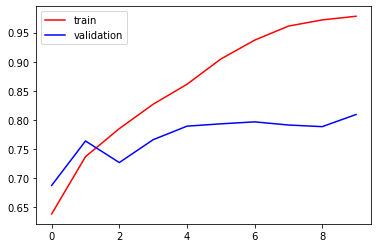

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color= 'blue' ,label= 'validation')
plt.legend()
plt.show()

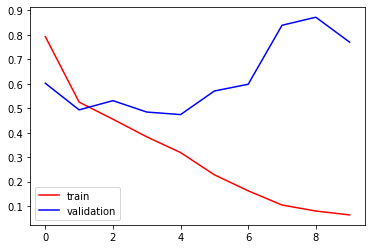

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color= 'blue' ,label= 'validation')
plt.legend()
plt.show()

In [ ]:
#reduce overfitting
import cv2

    


In [ ]:
test_img = cv2.imread('/content/dog.jpg')

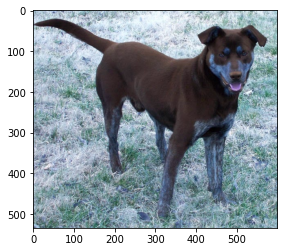

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(534, 600, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 24ms/step


array([[0.99779654]], dtype=float32)